# Demo


## Get Street Views

For the details of getting street views, see [streetscape](https://github.com/yonghah/streetscape)

In [1]:
import streetscape as ss
import os
GSV_API_KEY = os.environ["GSV_API_KEY"]
%matplotlib inline

In [2]:
# create obs points from a small town
# This process utilizes osmnx
import warnings
warnings.filterwarnings('ignore')
obs = ss.create_observation_points('Haywards Heath, UK')

In [3]:
# geopandas dataframe
obs.head()

,obs_point
0,POINT (-0.07049189921462974 50.99545322781479)
1,POINT (-0.07570351613498766 50.9942484577851)
2,POINT (-0.07368045935899452 50.99541581128218)
3,POINT (-0.07218572461058814 50.99539327892992)
4,POINT (-0.103641098385574 51.00266221173224)


4781


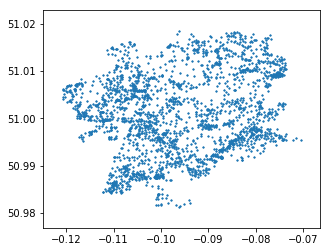

In [4]:
print(len(obs))
obs.plot(markersize=1)

In [6]:
# get 10 images from only last two points
%time
warnings.filterwarnings('ignore')
image_dir = '../output/streetview'
pic_per_obs = 10
ss.get_street_views_from_df(obs.tail(2), image_dir, pic_per_obs=pic_per_obs)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 10 µs


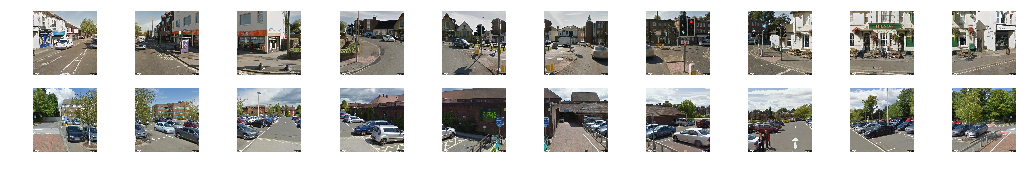

In [7]:
# look at images
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = []
for img_path in sorted(glob.glob(image_dir+'/*.jpg'), key=os.path.getmtime):
    images.append(mpimg.imread(img_path))
    
plt.figure(figsize=(18,4))
columns = pic_per_obs
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis('off')
    plt.imshow(image)

## Detect pedestrians

In [8]:
import gsv2pv as gv

In [26]:
%%time
image_dir = '../output/streetview'
result = gv.detect(image_dir, min_score_thresh=0.2, draw_box=True)

CPU times: user 34.1 s, sys: 1.4 s, total: 35.5 s
Wall time: 38.8 s


In [27]:
result

,heading,lid,path,ped_exp
0,36,4780,/home/ubuntu/repo/gsv2pv/output/streetview/LOC...,0.000000
1,180,4779,/home/ubuntu/repo/gsv2pv/output/streetview/LOC...,3.102224
2,180,4780,/home/ubuntu/repo/gsv2pv/output/streetview/LOC...,0.000000
3,252,4779,/home/ubuntu/repo/gsv2pv/output/streetview/LOC...,0.000000
4,0,4780,/home/ubuntu/repo/gsv2pv/output/streetview/LOC...,0.775319
5,144,4779,/home/ubuntu/repo/gsv2pv/output/streetview/LOC...,0.000000
6,324,4780,/home/ubuntu/repo/gsv2pv/output/streetview/LOC...,0.970565
7,252,4780,/home/ubuntu/repo/gsv2pv/output/streetview/LOC...,1.933471
8,324,4779,/home/ubuntu/repo/gsv2pv/output/streetview/LOC...,0.000000
9,144,4780,/home/ubuntu/repo/gsv2pv/output/streetview/LOC...,0.000000


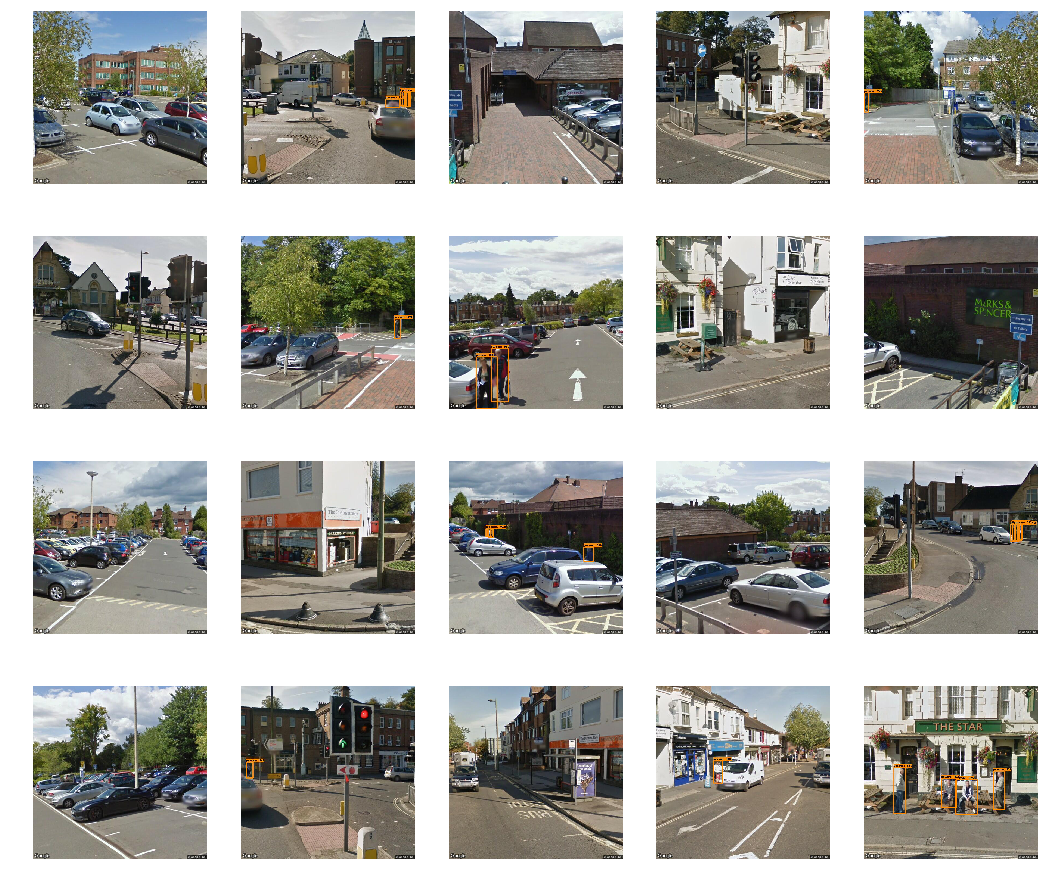

In [33]:
# look at images
images = []
for img_path in sorted(glob.glob(image_dir+'/*anno.jpeg'), key=os.path.getmtime):
    images.append(mpimg.imread(img_path))
    
plt.figure(figsize=(18,20))
columns = pic_per_obs /2
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis('off')
    plt.imshow(image)

In [11]:
result.to_csv("../output/log/test.csv")

In [29]:
# group by lid
import pandas as pd
df = pd.DataFrame({'ped_exp_gsv':result.groupby(by=['lid'])['ped_exp'].sum()})
df.head()

,ped_exp_gsv
lid,
4779,12.504228
4780,6.573372
